<a href="https://colab.research.google.com/github/Harshad1025/Harshad1025-Capstone-2-telecom-churn-analysis/blob/main/Telecom_Churn_Analysis_Capstone_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -Harshad Thombre**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.<br>
https://github.com/Harshad1025?tab=repositories

# **Problem Statement**


**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

#### **Define Your Business Objective?**

The primary business objective for exploring and analyzing the Orange Telecom's Churn Dataset is to identify key factors influencing customer churn and to formulate strategic recommendations aimed at improving customer retention. The goal is to gain actionable insights from the dataset, understand the patterns, and propose effective measures to reduce churn rates.

The ultimate goal is to foster a customer-centric approach that not only reduces churn but also enhances overall customer satisfaction. By implementing data-driven strategies, the aim is to create a more resilient and loyal customer base, positively impacting the long-term sustainability and profitability of Orange Telecom.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries


import functools
import os
import time
import warnings
import datetime

import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

blue = '\033[94m'
bold = '\033[1m'
italics = '\033[3m'
underline = '\033[4m'
end = '\033[0m'
pretty_print_start = italics+bold+underline+blue
pretty_print_end = italics+bold+underline+blue+end

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/telecom_churn.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

In [ ]:
data.tail()

In [ ]:
data.sample(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Dataset Rows count: {data.shape[0]}")
print(f"Dataset Columns count: {data.shape[1]}")

### Dataset Information

In [ ]:
# Dataset Info
data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cmap="viridis", cbar_kws={'label': 'Missing Data'})
plt.title('Visualization of Missing Values', fontsize=18)
plt.show()

### What did you know about your dataset?



1. **Size of the Dataset:**
   - The dataset contains 3333 rows and 20 columns.

2. **Columns and Data Types:**
   - The columns include a mix of numerical and categorical data types.
   - There are three main types of data in the dataset: `int64` (integer), `float64` (floating-point), `object` (string or categorical), and `bool` (boolean).

3. **Columns and Their Meanings:**
   - The dataset includes columns such as 'State,' 'Account length,' 'Area code,' 'International plan,' 'Voice mail plan,' 'Number vmail messages,' and various columns related to the total minutes, calls, and charges for day, evening, night, and international calls.

4. **Target Variable:**
   - The 'Churn' column appears to be the target variable, indicating whether a customer has canceled the subscription. It is of boolean type (`bool`), it has values of either `True` or `False`.

5. **Memory Usage:**
   - The memory usage of the dataset is approximately 498.1 KB, indicating the dataset is reasonably sized and should be manageable for analysis.

6. **Potential Features:**
   - There are features like 'International plan,' 'Voice mail plan,' and 'Customer service calls' that may be crucial for understanding customer behavior and predicting churn.

7. **Data Quality:**
   - No missing values are reported in the information, suggesting that the dataset is relatively clean. However, further exploration may reveal outliers or anomalies that need attention.



## ***2. Understanding Your Variables***

In [ ]:
# display only columns that contains text to confirm if dtype is correct or not
data.select_dtypes(include=['object','boolean']).columns.tolist()

In [ ]:
# desplay only columns that contains text to confirm if dtype is correct of not
data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# Dataset Columns
data.columns

In [ ]:
# Dataset Describe
data.describe()

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.

In [ ]:
# discriptive statistics on non-numerical features
data.describe(include=["object", "bool"])

### Variables Description



1. **State (Object):**
   - The state in which the customer resides.

2. **Account length (Integer):**
   - The number of days the customer has been an account holder.

3. **Area code (Integer):**
   - The three-digit area code corresponding to the customer's phone number.

4. **International plan (Object):**
   - Whether the customer has an international calling plan (Yes/No).

5. **Voice mail plan (Object):**
   - Whether the customer has a voice mail plan (Yes/No).

6. **Number vmail messages (Integer):**
   - The number of voice mail messages received by the customer.

7. **Total day minutes (Float):**
   - The total number of minutes the customer used during the day.

8. **Total day calls (Integer):**
   - The total number of calls made by the customer during the day.

9. **Total day charge (Float):**
   - The total charge incurred by the customer for day calls.

10. **Total eve minutes (Float):**
    - The total number of minutes the customer used during the evening.

11. **Total eve calls (Integer):**
    - The total number of calls made by the customer during the evening.

12. **Total eve charge (Float):**
    - The total charge incurred by the customer for evening calls.

13. **Total night minutes (Float):**
    - The total number of minutes the customer used during the night.

14. **Total night calls (Integer):**
    - The total number of calls made by the customer during the night.

15. **Total night charge (Float):**
    - The total charge incurred by the customer for night calls.

16. **Total intl minutes (Float):**
    - The total number of international minutes used by the customer.

17. **Total intl calls (Integer):**
    - The total number of international calls made by the customer.

18. **Total intl charge (Float):**
    - The total charge incurred by the customer for international calls.

19. **Customer service calls (Integer):**
    - The number of customer service calls made by the customer.

20. **Churn (Boolean):**
    - The target variable indicating whether the customer has canceled the subscription (True/False).



### Check Unique Values for each variable.

In [ ]:
print("Number of unique values ")
for column in data.columns:
    unique_values = len(data[column].unique())
    print(f"{column}: {unique_values}")

In [ ]:
data.nunique()

In [ ]:
# show all unique values for categorical columns
for col in data.select_dtypes(include=['object','boolean']):
    print(f"Feature name : {col}'\n' values: {data[col].unique()}'\n'")

In [ ]:
columns_to_exclude=[
    'Account length',
    'Number vmail messages',
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge' ,
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

In [ ]:
# Check Unique Values for each variable
for column in data.columns:
    if column not in columns_to_exclude:
        unique_values = data[column].unique()
        print(f"Unique values for {column}:", unique_values)
        print("-" * 50)



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# created a copy of original dataframe
df = data.copy()

In [ ]:
# 1) corrected column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_" )

In [ ]:
df.columns


In [ ]:
# # 3) Label encoding to  international_plans, voice_mail_plan, churn columns
# df['international_plan'] = df['international_plan'].replace({'Yes': 1, 'No': 0})
# df['voice_mail_plan'] = df['voice_mail_plan'].replace({'Yes': 1, 'No': 0})
# df['churn'] = df['churn'].replace({True: 1, False: 0})


In [ ]:
# converted from int data type to category [area_code column]
df['area_code'] =df['area_code'].astype('category')

In [ ]:
#  4) full state names
state_dict={
    'KS': 'Kansas',
    'OH': 'Ohio',
    'NJ': 'New Jersey',
    'OK': 'Oklahoma',
    'AL': 'Alabama',
    'MA': 'Massachusetts',
    'MO': 'Missouri',
    'LA': 'Louisiana',
    'WV': 'West Virginia',
    'IN': 'Indiana',
    'RI': 'Rhode Island',
    'IA': 'Iowa',
    'MT': 'Montana',
    'NY': 'New York',
    'ID': 'Idaho',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'TX': 'Texas',
    'FL': 'Florida',
    'CO': 'Colorado',
    'AZ': 'Arizona',
    'SC': 'South Carolina',
    'NE': 'Nebraska',
    'WY': 'Wyoming',
    'HI': 'Hawaii',
    'IL': 'Illinois',
    'NH': 'New Hampshire',
    'GA': 'Georgia',
    'AK': 'Alaska',
    'MD': 'Maryland',
    'AR': 'Arkansas',
    'WI': 'Wisconsin',
    'OR': 'Oregon',
    'MI': 'Michigan',
    'DE': 'Delaware',
    'UT': 'Utah',
    'CA': 'California',
    'MN': 'Minnesota',
    'SD': 'South Dakota',
    'NC': 'North Carolina',
    'WA': 'Washington',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'DC': 'District of Columbia',
    'KY': 'Kentucky',
    'ME': 'Maine',
    'MS': 'Mississippi',
    'TN': 'Tennessee',
    'PA': 'Pennsylvania',
    'CT': 'Connecticut',
    'ND': 'North Dakota'
    }

df['state'] = df['state'].replace(state_dict)


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

### Analysis

In [ ]:
churn_df = df[df['churn']==True]
churn_df.head()

In [ ]:

# Total No of Customers Churning
print("No. of customers Churning :",df[df['churn']==True].churn.count())

# Variable Assigning to churned data
churn_df = df[df['churn']==True]

# Total No of Unique Area Code
print("No of Unique Area Code :", df['area_code'].nunique())

# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", df[df['international_plan']=='Yes']['international_plan'].count())

# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :",df[df['voice_mail_plan']=='Yes']['voice_mail_plan'].count())

churn_df

In [ ]:
churn_df['churn'].count()/df['churn'].count() * 100

In [ ]:
# Customer churn in percentage
cust_churn_perc = churn_df['churn'].count()/df['churn'].count() * 100
print(f"Percentage of customer churning : {round(cust_churn_perc,2)}%")

In [ ]:
# statistics of churned customers
churn_df.describe()

In [ ]:
states = ['Alabama',
 'Delaware',
 'Georgia',
 'Illinois',
 'Kansas',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Nevada',
 'New Jersey',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'South Dakota',
 'Texas',
 'Vermont',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
states_of_interest = ['Alabama', 'Delaware', 'Georgia', 'Illinois', 'Kansas', 'Maine', 'Maryland', 'Massachusetts',
                       'Michigan', 'Minnesota', 'Nevada', 'New Jersey', 'North Carolina', 'Ohio', 'Oklahoma',
                       'South Dakota', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin', 'Wyoming']

filtered_states_df = churn_df[churn_df['state'].isin(states_of_interest)]
state_cust_churn_for = filtered_states_df.groupby(['state'])['churn'].value_counts().reset_index(name='churn_customer')
print(state_cust_churn_for.sum())
state_cust_churn_for.sort_values(by='churn_customer',ascending=False).head(10)


In [ ]:
# Statewise customer churning
# churn_df.groupby('state')['churn'].sum()
state_cust_churn = churn_df.groupby(['state'])['churn'].value_counts().reset_index(name='churn_customer')
print(state_cust_churn.sum())
state_cust_churn

In [ ]:
# top 10 states with highest churners
state_cust_churn.sort_values(by='churn_customer',ascending=False).head(10)

In [ ]:
# Account length wise churn data
acc_len_churn = churn_df.groupby(['account_length'])['churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn

In [ ]:
# Area Code wise churn Data
Area_code_churn_perc = (df.groupby(['area_code'])['churn'].mean()*100).reset_index()
Area_code_churn_perc

In [ ]:
# Area code wise Churn Count
Area_code_churn_count = churn_df.groupby(['area_code'])['churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count

In [ ]:
#Poor Connectivity by intersection of state by area code
Area_state_churn = churn_df.groupby(['area_code'])['state'].unique().reset_index(name='unique_state')
Area_state_churn

In [ ]:
# Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0,'unique_state']
Area_415_state_churn = Area_state_churn.loc[1,'unique_state']
Area_510_state_churn = Area_state_churn.loc[2,'unique_state']

inter_1= set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives {len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")

In [ ]:
# Percentage of Customers with and without international Plan churning to other networks
intl_plan_churn = (df.groupby(['international_plan'])['churn'].mean()*100).reset_index(name='Churn %')
print(intl_plan_churn)

# Total number of Customers churning with international plan
churn_intl_yes = churn_df[churn_df['international_plan']=='Yes']
print(f"No. of Customers churning having International plan is {churn_intl_yes['international_plan'].value_counts()[0]}")

# Total number of Customers churning without international plan
churn_intl_no = churn_df[churn_df['international_plan']=='No']
print(f"No. of Customers churning without having International plan is {churn_intl_no['international_plan'].value_counts()[0]}")

In [ ]:
# Percentage of People with and without Voice mail Plan churning to other networks
vmail_plan_churn = (df.groupby(['voice_mail_plan'])['churn'].mean()*100).reset_index(name='Churn %')
print(vmail_plan_churn)

# Total number of people churning with vmail plan
churn_vmail_yes = churn_df[churn_df['voice_mail_plan']=='Yes']
print(f"No of Customers churning having vmail plan is {churn_vmail_yes['voice_mail_plan'].value_counts()[0]}")

# Total number of people churning without vmail plan
churn_vmail_no = churn_df[churn_df['voice_mail_plan']=='No']
print(f"No of Customers churning not having vmail plan is {churn_vmail_no['voice_mail_plan'].value_counts()[0]}")

Churners with plans

In [ ]:
# Customers churning having intl plan and vmail plan
intl_vmail_yes = churn_df[(churn_df['international_plan'] == 'Yes') & (churn_df['voice_mail_plan'] == 'Yes')]
if len(intl_vmail_yes) > 0:
    print(f"No of Customers churning having intl and vmail plan are {intl_vmail_yes['churn'].value_counts().get(0)}")
else:
    print("No customers churning with both intl plan and vmail plan.")
print()
# Customers churning having no intl plan and no vmail plan
intl_vmail_no = churn_df[(churn_df['international_plan'] == 'No') & (churn_df['voice_mail_plan'] == 'No')]
if len(intl_vmail_no) > 0:
    print(f"No of Customers churning having no intl plan and no vmail plan are {intl_vmail_no['churn'].value_counts().get(0)}")
else:
    print("No customers churning with neither intl plan nor vmail plan.")
print()
# Customers churning having intl plan but no vmail plan
intl_yes_vmail_no = churn_df[(churn_df['international_plan'] == 'Yes') & (churn_df['voice_mail_plan'] == 'No')]
if len(intl_yes_vmail_no) > 0:
    print(f"No of Customers churning having intl plan but no vmail plan are {intl_yes_vmail_no['churn'].value_counts().get(0)}")
else:
    print("No customers churning with intl plan but no vmail plan.")
print()
# Customers churning having no intl plan but vmail plan
intl_no_vmail_yes = churn_df[(churn_df['international_plan'] == 'No') & (churn_df['voice_mail_plan'] == 'Yes')]
if len(intl_no_vmail_yes) > 0:
    print(f"No of Customers churning having no intl plan but vmail plan are {intl_no_vmail_yes['churn'].value_counts().get(0)}")
else:
    print("No customers churning with no intl plan but vmail plan.")


In [ ]:

# no of customer having both plan
plan_intl_vmail_yes = df[(df['international_plan'] == 'Yes') & (df['voice_mail_plan'] == 'Yes')]
print(plan_intl_vmail_yes['voice_mail_plan'].count() )
(intl_vmail_yes['churn'].value_counts().get(0)/plan_intl_vmail_yes['voice_mail_plan'].count() )*100

In [ ]:
# no of customer having both plan
plan_intl_vmail_no = df[(df['international_plan'] == 'No') & (df['voice_mail_plan'] == 'No')]
print(plan_intl_vmail_no['voice_mail_plan'].count())
(intl_vmail_no['churn'].value_counts().get(0)/plan_intl_vmail_no['voice_mail_plan'].count() )*100


In [ ]:
# no of customer having int plan but no vmail plan
plan_yes_intl_vmail_no = df[(df['international_plan'] == 'Yes') & (df['voice_mail_plan'] == 'No')]
print(plan_yes_intl_vmail_no['voice_mail_plan'].count())
(intl_yes_vmail_no['churn'].value_counts().get(0)/plan_yes_intl_vmail_no['voice_mail_plan'].count() )*100

In [ ]:
plan_no_intl_vmail_yes = df[(df['international_plan'] == 'No') & (df['voice_mail_plan'] == 'Yes')]
print(plan_no_intl_vmail_yes['voice_mail_plan'].count())
(intl_no_vmail_yes['churn'].value_counts().get(0)/plan_no_intl_vmail_yes['voice_mail_plan'].count() )*100

In [ ]:


# Customers churning having no intl plan and no vmail plan
intl_vmail_no = churn_df[(churn_df['international_plan'] == 'No') & (churn_df['voice_mail_plan'] == 'No')]
if len(intl_vmail_no) > 0:
    print(f"No of Customers churning having no intl plan and no vmail plan are {intl_vmail_no['churn'].value_counts().get(0)}")
else:
    print("No customers churning with neither intl plan nor vmail plan.")
print()
# Customers churning having intl plan but no vmail plan
intl_yes_vmail_no = churn_df[(churn_df['international_plan'] == 'Yes') & (churn_df['voice_mail_plan'] == 'No')]
if len(intl_yes_vmail_no) > 0:
    print(f"No of Customers churning having intl plan but no vmail plan are {intl_yes_vmail_no['churn'].value_counts().get(0)}")
else:
    print("No customers churning with intl plan but no vmail plan.")
print()
# Customers churning having no intl plan but vmail plan
intl_no_vmail_yes = churn_df[(churn_df['international_plan'] == 'No') & (churn_df['voice_mail_plan'] == 'Yes')]
if len(intl_no_vmail_yes) > 0:
    print(f"No of Customers churning having no intl plan but vmail plan are {intl_no_vmail_yes['churn'].value_counts().get(0)}")
else:
    print("No customers churning with no intl plan but vmail plan.")

In [ ]:
len(churn_df['state'].unique())

In [ ]:
# Poor Connectivity States
# States Sorted with respect to international and voice mail plan
state_intl_vmail_yes=intl_vmail_yes['state'].unique()
state_intl_vmail_no =intl_vmail_no['state'].unique()
state_intl_yes_vmail_no= intl_yes_vmail_no['state'].unique()
state_intl_no_vmail_yes= intl_no_vmail_yes['state'].unique()

# Intersection of 4 types of plan made
inter_1 = set(state_intl_vmail_yes).intersection(set(state_intl_vmail_no))
inter_2 = set(state_intl_yes_vmail_no).intersection(set(state_intl_no_vmail_yes))
Intersection =set(inter_1).intersection(set(inter_2))
print(f"List of poor connectivity states are : {list(Intersection)}")

In [ ]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = df.groupby(['churn'])['number_vmail_messages'].mean().reset_index(name='perc_vmail_mssg')
vmail_mssg_churn

In [ ]:
numeric = df.columns.astype()

In [ ]:
# Average of feature for churners and non churners
for col in numerical_columns:
  print(df.groupby('churn')[col].mean().reset_index())
  print()



In [ ]:
#creating total [calls-minuts-charge] without considering international calls
df["no_inter_total_calls"]=df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']
df["no_inter_total_revenue"]=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']
df["no_inter_total_minutes"]=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']

# creating total columns with internationl [calls-minuts-charge]
df["total_calls"]=df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']+df['total_intl_calls']
df["total_revenue"]=df['total_day_charge']+df['total_eve_charge']+df['total_night_charge']+df['total_intl_charge']
df["total_minutes"]=df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']+df['total_intl_minutes']

In [ ]:
df.columns

In [ ]:
mins_per_call = df["no_inter_total_minutes"].sum()/ df["no_inter_total_calls"].sum()
print(f"Minute per call for Non-International calls: {mins_per_call:.2f} min per call")
print()

charge_per_min = df["no_inter_total_revenue"].sum()/ df["no_inter_total_minutes"].sum()
print(f"Cost per Minute for Non-International Minutes: ${charge_per_min:.2f} per minute")
print()

mins_per_call_int = df["total_intl_minutes"].sum()/ df["total_intl_calls"].sum()
print(f"Minute per call for International calls: {mins_per_call_int:.2f} min per call")
print()

charge_per_min_int =  df["total_intl_charge"].sum() /df["total_intl_minutes"].sum()
print(f"Cost per Minute for International Minutes: ${charge_per_min_int:.2f} per minute")

 #### Revenue is generated without international calls “charge”?

In [ ]:
# Revenue is generated without international calls “charge”?
revenue_without_inter = df["no_inter_total_revenue"].sum()
print(f"Revenue is generated without international calls: ${revenue_without_inter}")
print()

# Revenue is generated with international calls “charge”?
total_revenue = df["total_revenue"].sum()
print(f"Revenue is generated with international calls: ${total_revenue}")
print()

# Revenue is generated only from international calls
print(f"Revenue is generated only from international calls: ${round(total_revenue - revenue_without_inter,2)}")

How much profit generated from international calls from people who have international plan?

also how much revenue generated from international calls from people who don’t have international plan?

In [ ]:
# Calculate total cost of international calls for people with an international plan
total_cost_intl_plan = df.loc[df['international_plan'] == 'Yes', 'total_intl_charge'].sum()

# Calculate total cost of international calls for people without an international plan
total_cost_no_intl_plan = df.loc[df['international_plan'] == 'No', 'total_intl_charge'].sum()

print(f"Revenue generated from international calls for people with international plan: ${total_cost_intl_plan:.2f}")
print()
print(f"Revenue generated from international calls for people without international plan: ${total_cost_no_intl_plan:.2f}")

**it looks that cost per minute for international calls doesn't chage for people with and without the plan**

In [ ]:
# Calculate total number of international minutes for people with an international plan
total_minutes_intl_plan = df.loc[df['international_plan'] == 'Yes', 'total_intl_minutes'].sum()

# Calculate total number of international minutes for people without an international plan
total_minutes_no_intl_plan = df.loc[df['international_plan'] == 'No', 'total_intl_minutes'].sum()

# Calculate cost per minute for people with an international plan
cost_per_minute_intl_plan = total_cost_intl_plan / total_minutes_intl_plan

# Calculate cost per minute for people without an international plan
cost_per_minute_no_intl_plan = total_cost_no_intl_plan / total_minutes_no_intl_plan

print(f"Cost per minute for people with an international plan: ${cost_per_minute_intl_plan:.2f}")
print()
print(f"Cost per minute for people without an international plan: ${cost_per_minute_no_intl_plan:.2f}")

In [ ]:
# Customer Service Call data
print("No of unique service calls made :", df['customer_service_calls'].nunique())

# Percentage of churning based on the customer service calls made
(df.groupby(['customer_service_calls'])['churn'].mean()*100).reset_index(name='Perc_churned')

### What all manipulations have you done and insights you found?

1) corrected column names <br>

2) added new columns <br>

3) Label encoding to  international_plans, voice_mail_plan, churn columns <br>

4) Area code should be a categorical column <br>

5)  Full state names are more readable and intuitive for individuals who may not be familiar with state abbreviations. so using full names.


In [ ]:
churn_df.groupby('international_plan')['churn'].sum()

1) **Total day charge is comparatively higher for the users who has churned**
```
   churn     Mean total_day_charge
0  No         29.780421
1  Yes        35.175921

```
1) **Users Having inernational plan activated are more likely to churn**

```
  international_plan    Churn %
0                 No  11.495017
1                Yes  42.414861
```



```
  voice_mail_plan    Churn %
0              No  16.715056
1             Yes   8.676790
```

3) **Churners based on int and vmail plan**

    i) having both plan 39% churn rate

    ii) having int plan but no vmail plan 43% churn rate

4) states having churning % greater than 20%

In data wrangling the first thing we did is to find out how customers have churn and how many are not and their rate. We know that plotting charts will give us more visual representation. So from this we got to know that there are ~14.5 % churn customers are there.

After that we did some manipulations on basis of area code which we tabularised it.

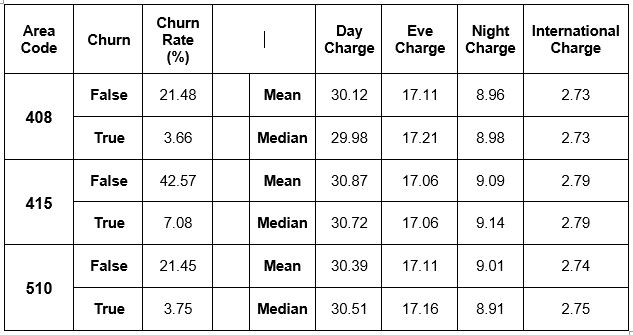

From above table we can see that more customer are from area code 415 but if we check the distribution of churn it almost same in all area code.
* **cost per min**
     
  - For International calling with and without *International plan*

    - With : $0.27

    - Without : $0.27
  - for international and non international call ( without considering plan)
    - international : $0.27
    - non international : $0.10


**Churn on basis of international plan**

In this we found out that those who has international plan their churn rate is higher, almost 42.41 % customers are churned.


**Churn on basis of International & Voice mail plan**

Total Customer churn are :- 483

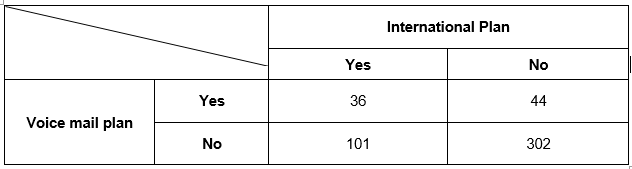

So, from this table we can say that those who has neither international plan nor having vmail plan are churned high, almost around 62 %.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate analysis**

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

## **Categorical columns**

In [ ]:
categorical_col = [ 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
total_count = len(df)

for column in categorical_columns:
    print(f"Column: {column}")
    value_counts = df[column].value_counts()
    percentage_values = (value_counts / total_count) * 100

    for value, count in value_counts.items():
        percentage = percentage_values[value]
        print(f"{value}: Count = {count}, Percentage = {percentage:.2f}%")

    print("\n")

### 1) Count plot

In [ ]:
# Distribution of categorical columns using count plots
for column in categorical_col:
    plt.figure(figsize=(9, 7))
    ax = sns.countplot(data=df, x=column, palette='Set2')

    # Adding annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)


    # Show the plot
    plt.show()

    # Close the plot to avoid overlapping when creating the next plot
    plt.close()


for better visuals created separate plots for each feature

In [ ]:

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='area_code', palette='Set2')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.title(f'Count Plot of area_code')
plt.xticks(rotation=90)
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='international_plan', palette='Set2')
plt.xlabel('international_plan')
plt.ylabel('Count')
plt.title(f'Count Plot of international_plan')
plt.xticks(rotation=90)
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x=column, palette='Set2')
plt.xlabel('voice_mail_plan')
plt.ylabel('Count')
plt.title(f'Count Plot of voice_mail_plan')
plt.xticks(rotation=90)
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='state')
plt.xlabel('state')
plt.ylabel('Count')
plt.title('Count Plot of state')
plt.xticks(rotation=90)
plt.show()
plt.close()

##### 1. Why did you pick the specific chart?

**countplot** is suitable for visualizing categorical data as it efficiently displays the count of each category, offering a quick overview of the distribution of categorical variables.

##### 2. What is/are the insight(s) found from the chart?



1) 1st chart reveals a concentration of users in area code 415, with approximately equal numbers in area codes 510 and 408.

2) 2nd chart illustrates that the majority of our users, around 90%, do not have an international plan, indicating a low adoption of this service among our customer base.

3) According to the 3rd chart, approximately 27.66% of our users have opted for the voicemail plan, suggesting a moderate level of interest in this feature.

4) 4rth chart highlights that West Virginia has the highest customer count, contrasting with California, which has the lowest number of customers compared to other states.

##### 3. Will the gained insights help creating a positive business impact?

##### Are there any insights that lead to negative growth? Justify with specific reason.

1) **Concentration in Area Code 415:**
   - *Positive Impact:* Enables targeted marketing and resource allocation.
   - *Negative Growth:* Unlikely, as concentrating resources strategically can be positive.

2) **Low Adoption of International Plan:**
   - *Positive Impact:* Identifies opportunities for promoting international plans.
   - *Negative Growth:* Possible if unaddressed, as it indicates missed revenue opportunities.

3) **Moderate Voicemail Plan Adoption:**
   - *Positive Impact:* Allows for targeted promotions and improved customer engagement.
   - *Negative Growth:* Potential if adoption remains stagnant and the plan is a significant revenue driver.

4) **State-wise Customer Distribution:**
   - *Positive Impact:* Informs tailored strategies for marketing and service improvements.
   - *Negative Growth:* Unlikely from the insight itself, but not addressing low customer counts in certain states could hinder business expansion.

### 2) Donut Chart

In [ ]:
churn_percentage = (df['churn'].value_counts() / df.shape[0] * 100).round(2).astype(str) + '%'
churn_percentage

In [ ]:
data = df['churn'].value_counts()

plt.pie(data.values, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.legend(loc='upper left')
plt.title('Churn Distribution (Donut Chart)')
plt.show()



##### 1. Why did you pick the specific chart?

I chose a donut chart to visually represent the Churn Distribution due to its aesthetic appeal and clear depiction of the proportion of Churned and Not Churned categories. The central hole enhances visual engagement while maintaining data clarity, making it an effective choice for this categorical analysis.

##### 2. What is/are the insight(s) found from the chart?

The donut chart provides a visual insight into the churn distribution, revealing that approximately 14.5% of customers have churned. This indicates the proportion of customers who ended their subscription, giving a quick and clear understanding of the overall churn rate in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


- *Positive Impact:* The pie chart's insight into a 14.5% churn rate provides a quick and clear understanding of the overall churn in the dataset. This information can guide strategic efforts to improve customer retention and loyalty.
- *Negative Growth:* If the churn rate is considered high for the industry or business standards, it may lead to negative growth, indicating a potential problem in customer satisfaction and retention strategies.

The churn distribution can positively impact business decisions by highlighting the need for effective retention strategies. Conversely, a high churn rate may signal negative growth potential if not addressed promptly.

## **Numerical data**

In [ ]:
numerical_columns

### 3) Box plot

#### a)

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='total_day_calls', color='lightblue')
plt.ylabel('Total Day Calls', fontsize=12)
plt.ylim(bottom=0)
# plt.title('Boxplot of Total Day Calls')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='total_eve_calls', color='lightgreen')
plt.ylabel('Total Eve Calls', fontsize=12)
plt.ylim(bottom=0)
# plt.title('Boxplot of Total Eve Calls')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='total_night_calls', color='orange')
plt.ylabel('Total Night Calls', fontsize=12)
plt.ylim(bottom=0)
# plt.title('Boxplot of Total Night Calls')

plt.suptitle('Call Distribution Across Different Times of Day', fontsize=16)  # Overall title

plt.subplots_adjust(wspace=0.4)
# plt.grid()
plt.show()



##### 1. Why did you pick the specific chart?

I chose boxplots for 'total_day_calls,' 'total_eve_calls,' and 'total_night_calls' because they effectively illustrate the distribution of numerical data, showcasing key statistics like median and quartiles. This visualization choice allows for a clear comparison of call distributions across different times of the day. Boxplots are particularly suitable for displaying variations in multiple categories, making it easy to observe and compare data distribution characteristics.

##### 2. What is/are the insight(s) found from the chart?

From above plots can see that more calls are made in the morning with respect to the evening and night when it is the lowest

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Morning Call Peak:** The graph shows that more calls happen in the morning compared to the evening and night, peaking during those early hours.

**Impact on Business:**
- *Positive Impact:* Knowing about the morning peak helps the business better plan staff schedules and promotions, making customers happier.

- *Negative Growth:* Ignoring the busy morning time might mean missing chances to make customers happier and could lead to slower growth for the business.

#### b)


In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='total_day_minutes', color='lightblue')
plt.ylabel('Total Day Minutes', fontsize=12)
plt.ylim(bottom=0)


plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='total_eve_minutes', color='lightgreen')
plt.ylabel('Total Eve Minutes', fontsize=12)
plt.ylim(bottom=0)


plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='total_night_minutes', color='orange')
plt.ylabel('Total Night Minutes', fontsize=12)
plt.ylim(bottom=0)

plt.suptitle('Call Duration Distribution Across Different Times of Day', fontsize=16)  # Overall title

plt.subplots_adjust(wspace=0.4)

plt.show()


##### 1. Why did you pick the specific chart?

I chose boxplots for 'total_day_minutes,' 'total_eve_minutes,' and 'total_night_minutes' because they effectively showcase the distribution of call duration, highlighting key statistics like median and quartiles. This visualization choice allows for a clear comparison of call duration across different times of the day. Boxplots are especially suitable for revealing variations in multiple categories, providing a concise summary of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

* Despite having more calls made during the day, we can see that users do not spend longer time on the calls in the evening.
* Users tend to talk for longer time in the evening than other times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Morning Call Duration:** Despite more calls in the morning, users do not spend longer on calls during this time.

**Evening Call Duration:** Users tend to talk for a longer time in the evening compared to other times.

**Impact on Business:**
- **Positive Impact:** Recognizing that users talk longer in the evening can inform targeted promotions or service enhancements during peak call duration, potentially increasing customer satisfaction.

- **Negative Growth:** If the business fails to leverage the insight about shorter morning calls and longer evening calls, it may miss opportunities to tailor services or promotions, potentially leading to stagnation in customer engagement and business growth. Ignoring patterns in call duration might result in misaligned strategies and lower satisfaction during peak usage times.

#### c)


In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='total_day_charge', color='lightblue')
plt.ylabel('Total Day Charge', fontsize=12)
plt.ylim(bottom=0)


plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='total_eve_charge', color='lightgreen')
plt.ylabel('Total Eve Charge', fontsize=12)
plt.ylim(bottom=0)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='total_night_charge', color='orange')
plt.ylabel('Total Night Charge', fontsize=12)
plt.ylim(bottom=0)

plt.suptitle('Charge Distribution Across Different Times of Day', fontsize=16)  # Overall title

plt.subplots_adjust(wspace=0.4)

plt.show()


##### 1. Why did you pick the specific chart?

I chose boxplots for 'total_day_charge,' 'total_eve_charge,' and 'total_night_charge' because they effectively visualize the distribution of call charges, emphasizing key statistics like median and quartiles. This choice allows for a clear comparison of charge distribution across different times of the day. Boxplots succinctly summarize the variability in multiple categories, offering insights into how charges vary during specific periods, which is essential for understanding customer behavior and optimizing pricing strategies.

##### 2. What is/are the insight(s) found from the chart?

The charges are maximum in the evening time and lowest in the night time.
These plots are in conjunction with the minutes spoken.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1. **Evening Charges Peak:** Charges are highest in the evening, correlating with the longer call durations during that time.
2. **Night Charges Lowest:** Charges are lowest at night, aligning with shorter call durations during this period.

**Impact on Business:**
- *Positive Impact:* Recognizing the evening charges peak allows the business to optimize pricing strategies or introduce targeted promotions during high-charge periods, potentially increasing revenue. Aligning charges with usage patterns can enhance customer satisfaction.

- *Negative Growth:* If the business fails to align pricing strategies with usage patterns, especially during peak evening hours, it may miss opportunities to maximize revenue. Neglecting these insights could lead to misaligned pricing and potential dissatisfaction among customers, impacting long-term growth prospects.

### 4) Histplot

In [ ]:
df.columns

#### a)

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(10, 6))


sns.histplot(data=df, x='account_length', bins=20, kde=True, color='#5DADE2', edgecolor='black')


plt.axvline(df['account_length'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Account Length')
plt.legend()  # Show legend with the mean line

sns.despine()

plt.show()
plt.close()


##### 1. Why did you pick the specific chart?

I chose a histogram with a kernel density estimate (KDE) for 'account_length' to visually represent the distribution of customer account durations. This choice effectively highlights the central tendency, spread, and common durations, providing a comprehensive overview. The dashed red line indicating the mean adds clarity to the average account length, facilitating insights into customer tenure patterns.

##### 2. What is/are the insight(s) found from the chart?

**Insight from the Chart:**

- **Central Tendency:** The dashed red line represents the mean account length, which is approximately 101.06. This indicates the average duration for which customers have held their accounts.

- **Spread of Data:** The histogram and kernel density estimate (KDE) showcase the distribution of account lengths. The spread of data is evident, ranging from a minimum of 1 day to a maximum of 243 days.

- **Common Durations:** The quartiles (25th, 50th, and 75th percentiles) provide insights into common durations. For instance, 50% of customers have an account length between 74 and 127 days, emphasizing the concentration of account durations within this range.

Overall, the chart provides a visual summary of account length distribution, highlighting the central tendency and variability in customer account durations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
Understanding the average account length guides tailored retention strategies, enabling the identification of loyal customers and opportunities for exclusive loyalty programs. Recognizing common durations informs targeted promotions for diverse customer segments, allowing for personalized engagement strategies.

**Potential Negative Impact:**
Neglecting variability in account lengths may lead to generalized strategies, missing opportunities for personalized engagement with loyal customers and negatively affecting customer satisfaction and business growth.

#### b)

In [ ]:
# Chart - 6 visualization code

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number_vmail_messages', bins=20, kde=True, color='skyblue', edgecolor='black')


plt.xlabel('Number of Voicemail Messages', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Voicemail Messages', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a special kind of bar chart to show how many people use different amounts of voicemail messages. I used logarithmic scale to make it easier to see the details, especially for people who don't use voicemail much. This helps us notice that many people hardly use voicemail, and a few use it a lot.

##### 2. What is/are the insight(s) found from the chart?

A substantial number of clients exhibit near to zero voicemail usage, forming a distinct peak, while the distribution for the remaining clients follows a more typical, bell-shaped pattern. This suggests a notable segment of users either does not utilize or has disabled voicemail services, presenting an opportunity for targeted engagement or service customization for this specific group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1. **Distinct Voicemail Peak:** A substantial number of clients show near-zero voicemail usage, forming a distinct peak in the distribution.
2. **Typical Bell-Shaped Pattern:** The distribution for the remaining clients follows a more typical, bell-shaped pattern.

**Impact on Business:**
- *Positive Impact:* Recognizing the significant segment with minimal voicemail usage presents an opportunity for targeted engagement or customized services. This insight can guide personalized marketing strategies or feature enhancements, potentially increasing user satisfaction and loyalty.

- *Negative Growth:* Ignoring the distinct voicemail peak might result in missed opportunities for engagement and customization for a notable user segment. Failing to address the specific needs or preferences of this group could lead to dissatisfaction and potential attrition, impacting long-term business growth.

#### c)

In [ ]:

sns.set(style="whitegrid")
sns.set_palette("pastel")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot without log scale
sns.histplot(data=df, x='customer_service_calls', bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Number of Customer Service Calls', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Customer Service Calls', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot with log scale
sns.histplot(data=df, x='customer_service_calls', bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Number of Customer Service Calls', fontsize=12)
axes[1].set_ylabel('Frequency (Log Scale)', fontsize=12)
axes[1].set_title('Distribution of Customer Service Calls (Log Scale)', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_yscale('log')


plt.tight_layout()

plt.show()


In [ ]:
df['customer_service_calls'].describe()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Insight(s) from the Chart:**
- **Central Tendency:** The histogram reveals that the majority of customers make 1 to 2 customer service calls, as indicated by the peak around the mean of 1.56.
  
- **Spread of Data:** The distribution has a right-skewed shape, suggesting that while most customers have a low number of service calls, there are instances of higher call frequencies, with a maximum of 9 calls.

- **Common Scenarios:** The quartiles indicate that 50% of customers make 1 or fewer calls, while 75% make 2 or fewer calls. This emphasizes the prevalence of relatively low customer service call volumes.

Overall, the chart provides insights into the typical customer service call patterns, highlighting a concentration around a moderate number of calls, with a tail indicating instances of higher call frequencies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact:**
- **Positive Impact:** Understanding common scenarios allows for targeted and efficient allocation of customer service resources. Recognizing the right-skewed distribution helps in identifying and addressing the needs of customers with higher call frequencies, potentially enhancing customer satisfaction.

- **Negative Growth Risk:** Neglecting the instances of higher call frequencies may lead to inadequate resource allocation and a failure to address the needs of a subset of customers. Ignoring this variability might result in negative growth as the business might miss opportunities to improve service quality and customer experience for those with higher service call requirements.

# **Bivariate analysis**

In [ ]:
# defining a function for getting percentages
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['Percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_NO', 'churn_YES', 'total', 'churn_percentage']
    return tab

### 5) Barplot

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:

target_column = 'churn'

included_columns = df.columns[df.columns != target_column]
corr_with_churn = df[included_columns].corrwith(df[target_column])
corr_df = pd.DataFrame({'Correlation with Churn': corr_with_churn})

corr_df = corr_df.sort_values(by='Correlation with Churn', ascending=False)
plt.figure(figsize=(14, 5))
sns.barplot(x=corr_df.index, y='Correlation with Churn', data=corr_df, palette='coolwarm')
plt.title('Correlation with Churn', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

#### How does Total day minutes spoken relate to the Churn rate

In [ ]:
# Chart - 9 visualization code
palette = sns.color_palette("pastel")

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=df, x='customer_service_calls', y='total_day_charge', hue='churn',ci=False, palette=palette)

plt.title('Total Day Charges vs Customer Service Calls (Churn vs Non-Churn)', fontsize=18)

plt.xlabel('Customer Service Calls', fontsize=15)
plt.ylabel('Total Day Charges', fontsize=15)

plt.legend(title='Churn', title_fontsize='14', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
crosstab_function(df,'customer_service_calls')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.
At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:

palette = sns.color_palette("Set2")

# Create a figure and axis
plt.figure(figsize=(15, 6))

# Plot the jointplot
joint_plot = sns.jointplot(data=df, x='total_day_minutes', y='total_day_charge',
                           hue='churn', alpha=0.3, marker='o', s=50, palette=palette)

# Add a title
plt.subplots_adjust(top=0.9)
joint_plot.fig.suptitle('Total Day Minutes vs Total Day Charges (Churn vs Non-Churn)', fontsize=16)

# Set labels and font size
plt.xlabel('Total Day Minutes', fontsize=13)
plt.ylabel('Total Day Charges', fontsize=13)

# Customize legend
joint_plot.ax_joint.legend(title='Churn', title_fontsize='13', loc='lower right')
plt.show()


A linear relationship can be observed between the two Variables.

Visible Churn can be seen with higher charges imposed when spoken for longer times.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

palette = sns.color_palette("Set2")

# Create a figure and subplots
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='total_day_charge', y='total_day_minutes',
                hue='churn', alpha=0.6, palette=palette, marker='o', s=50)
plt.title('Total Day', fontsize=12)
plt.xlabel('Total Day Charge', fontsize=9)
plt.ylabel('Total Day Minutes', fontsize=9)
plt.legend(title='Churn', title_fontsize='9', loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='total_eve_charge', y='total_eve_minutes',
                hue='churn', alpha=0.6, palette=palette, marker='o', s=50)
plt.title('Total Eve', fontsize=12)
plt.xlabel('Total Eve Charge', fontsize=9)
plt.ylabel('Total Eve Minutes', fontsize=9)
plt.legend(title='Churn', title_fontsize='9', loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 3
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='total_night_charge', y='total_night_minutes',
                hue='churn', alpha=0.6, palette=palette, marker='o', s=50)
plt.title('Total Night', fontsize=12)
plt.xlabel('Total Night Charge', fontsize=9)
plt.ylabel('Total Night Minutes', fontsize=9)
plt.legend(title='Churn', title_fontsize='9', loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

We can observe from the three scatterplots that the churn rate is maximum times True in the Day.
In the evening and night we can see that the churn rate is not so relevant.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

How do Users with international plan relate with the churn?

In [ ]:
# Chart - 11 visualization code

palette = sns.color_palette("pastel")

# Create a categorical plot
catplot = sns.catplot(data=df, x='international_plan', hue='churn', kind='count', palette=palette)

# Add title
plt.subplots_adjust(top=0.9)
catplot.fig.suptitle('Churn Count Based on International Plan Status', fontsize=16)

# Set labels and font size
catplot.set_xlabels('International Plan Status', fontsize=12)
catplot.set_ylabels('Count', fontsize=12)

# Show the plot
plt.show()


In [ ]:
df.columns

In [ ]:
crosstab_function(df,'international_plan')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Users who Have an international plan are relatively very less than those who do not.
We can also observe that people who have an international plan have almost equal churn rate.

peoples having international plan are 42% likely to churn

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
palette = sns.color_palette("pastel")

# Create a categorical plot
catplot = sns.catplot(data=df, x='voice_mail_plan', hue='churn', kind='count', palette=palette)

# Add title
plt.subplots_adjust(top=0.9)
catplot.fig.suptitle('Churn Count Based on Voice mail Plan Status', fontsize=16)

# Set labels and font size
catplot.set_xlabels('Voice mail Plan Status', fontsize=12)
catplot.set_ylabels('Count', fontsize=12)

# Show the plot
plt.show()


In [ ]:
crosstab_function(df,'voice_mail_plan')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Comparison of Churn Percentages:

Customers without a voice mail plan seem to have a higher churn percentage compared to those with a voice mail plan.
This suggests that the presence of a voice mail plan might be associated with lower churn rates.
Insights for Stakeholders:

Stakeholders can consider promoting or emphasizing the voice mail plan feature as it appears to be associated with lower churn.
Marketing efforts could target customers without a voice mail plan to encourage adoption and potentially reduce churn.
Further Analysis:

To strengthen these insights, you might want to explore additional features and conduct a more in-depth analysis.
Consider visualizations, such as bar plots or pie charts, to represent the churn percentages visually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
df.columns

In [ ]:
# Chart - 13 visualization code
palette = sns.color_palette("pastel")

# Create a categorical plot
catplot = sns.catplot(data=df, x='customer_service_calls', hue='churn', kind='count', palette=palette)

# Add title
plt.subplots_adjust(top=0.9)
catplot.fig.suptitle('Churn Count Based on customer_service_calls', fontsize=16)

# Set labels and font size
catplot.set_xlabels('customer_service_calls', fontsize=12)
catplot.set_ylabels('Count', fontsize=12)

# Show the plot
plt.show()


In [ ]:
76/166

In [ ]:
crosstab_function(df[df['customer_service_calls']>3],'customer_service_calls')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:

plt.figure(figsize=(15, 10))

# Customize the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap)', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen due to its ability to visually represent correlations in a concise manner. Its color gradients and annotations facilitate the identification of high correlation values. It efficiently communicates relationships between variables, aiding in the interpretation of patterns. Specific details, such as the correlation of 'churn' with various features, become easily noticeable. The heatmap's clarity and visual appeal make it an effective tool for exploring complex interdependencies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**With regard to the heatmap we can see high correlation bettween the following variables:¶**

**With respect to churn**
* Total day minutes to Churn at 0.21
* Total day charge to Churn at 0.21
* Customer service calls to Churn at 0.21
* International plan to Churn at 0.26

**Other relations:**
* Total day charge to Total day minutes at 1
* Total evening charge to total eve minutes at 1
* total night charge to total night minutes at 1

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**


Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning.
It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
International plan users are more consistent with their churn w.r.t the ones who do not have the service.
Prescription:
Introducing plans which minimize costs for more number of calls can be used.
Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
Improvement in the customer service can be done to reduce the number of calls which cause the churn.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

In [ ]:
pd.crosstab(df["churn"], df["voice_mail_plan"], normalize=True).unstack()

In [ ]:
temp_df_1 = df[(df['customer_service_calls']>3) & (df['international_plan']==1)]

In [ ]:
temp_df_2 = df[(df['customer_service_calls']>3) & (df['international_plan']==0)]

In [ ]:
temp_df_1['churn'].value_counts()

In [ ]:
temp_df_2['churn'].value_counts()

In [ ]:
sns.countplot(data =temp_df_2,x="churn")

In [ ]:
sns.countplot(data =temp_df_1,x="churn")